<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/PlayStoreAppReview_DataWrangling/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Loading file into colab and analysing dataframe

In [74]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/New/PlayStoreAppReview/Copy of Play Store Data.csv')

df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [75]:
df.shape # shape of dataframe

(10841, 13)

In [76]:
df_copy = df.copy() #copying complete dataset


In [77]:
df_copy.describe() # To know Central limit of columns contatining numeric values

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [78]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [79]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#Cleaning DATA/ DATA Wrangling

## Dealing with Outliers
#### in the above code block we found Rating column has more number of missing values to be handle 

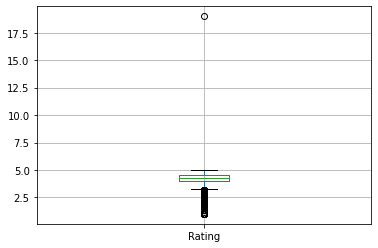

In [80]:
df_copy.boxplot() #to see whether are there any outlier

In [81]:
df_copy[df_copy['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [82]:
#to know the length of App of index 10472
len(df['App'][10472])

39

In [83]:
# I found in record 10472 all the field values are shifted towards left
# so i made a try to set them and if i am unsuccessful will drop the record


col = list(df.columns)
print(col)

idx = df_copy.index[df['Rating'] > 5].tolist()[0]
df_copy.loc[idx,'Rating'] = float(df.loc[idx, col[1]])
df_copy.loc[idx, col[0]] = df.loc[idx, col[0]][0:16]
df_copy.loc[idx, col[1]] = df.loc[idx, col[0]][16:40]

for j in range(2,len(col)-1):
  df_copy.loc[idx, col[j+1]] = df.loc[idx, col[j]]
  
df_copy[idx:idx+1]

# df_copy[col[0]][df_copy.index[df_copy['Rating'] > 5].tolist()[0]][0:16]
# the above code in statement,
# I had took concept help from google to get the index of particular record


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi,Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


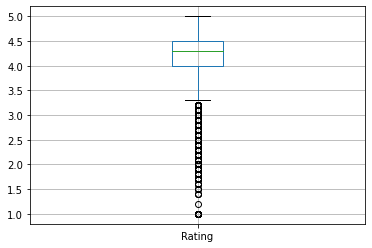

In [84]:
# let's again check whether are there any outliers

df_copy.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3aabd5850>]],
      dtype=object)

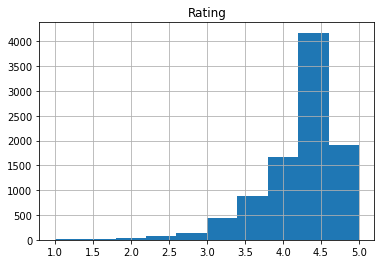

In [85]:
df_copy.hist() # its seems to be like skewed right side

## Filling/ Imputating of missing data
#### now it looks ratings columns has no null values 
####lets work on type, Genres , current ver and Andriod Ver field

In [86]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [87]:
# creating function to update series of rating
def imputate_rating(ser):
  return ser.fillna(ser.mean())

In [88]:
# updating series rating which are null values
df_copy['Rating'] = df_copy['Rating'].transform(imputate_rating)

In [89]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [90]:
## observing data we feel that Category value is same as Genres so, as there is 
## only record is to be updated we are filling it with category data
df_copy['Genres'].fillna(df_copy.loc[idx,'Category'],inplace= True)
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [91]:
## As all the above missing values are Qualitative data , we have decided to 
## fill them will most repitative value in that series nothing but mode of 
##that series
df_copy['Type'].fillna(df_copy['Type'].mode().values[0], inplace = True)
df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode().values[0], inplace = True)
df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode().values[0], inplace = True)

df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

##DATA formatting
#### Now till here we have handled the dataset with missing values
#### However now we need to look at the format of the data like for installs, price and review field should be in numerics

In [113]:
df_copy['Price'] = df_copy['Price'].apply(lambda x : float(str(x).replace('$','')) if '$' in str(x) else float(str(x)))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df_copy['Installs'] = df_copy['Installs'].apply(lambda x : float(str(x).replace(',','')) if ',' in str(x) else float(str(x)))
df_copy['Reviews'] = df_copy['Reviews'].astype(float)
df_copy['Reviews']

## Here we have updated the format of required fields

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

#Hypothesis 1

####1.grouping the category field of the App in given dataset and then getting average over rating field for that particular category field

In [ ]:
df_copy.groupby('Category',as_index=False)['Rating'].mean()


,Category,Rating
0,ART_AND_DESIGN,4.350378
1,AUTO_AND_VEHICLES,4.190567
2,BEAUTY,4.260503
3,BOOKS_AND_REFERENCE,4.310607
4,BUSINESS,4.145364
5,COMICS,4.156384
6,COMMUNICATION,4.163564
7,DATING,4.007560
8,EDUCATION,4.387766
9,ENTERTAINMENT,4.126174
